### Required Libs and Modules

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nBagg')
import plotly.express as px
import seaborn as sns
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS

### Reading the csv files and Combining 

In [66]:
baner = pd.read_csv('data_source/Swiggy_Data_baner.csv')
hinjewadi = pd.read_csv('data_source/Swiggy_Data_hinjewadi.csv')
hinjewadi_phase3 = pd.read_csv('data_source/Swiggy_Data_hinjewadi_phase3.csv')
#pcmc = pd.read_csv('data_source/Swiggy_Data_pcmc.csv')
wakad = pd.read_csv('data_source/Swiggy_Data_wakad.csv')

In [67]:
baner['locality'] = 'Baner'
hinjewadi['locality'] = 'Hinjewadi'
hinjewadi_phase3['locality'] = 'Hinjewadi_phase3'
#pcmc['locality'] = 'Pcmc'
wakad['locality'] = 'Wakad'

In [68]:
baner

,details,title,spec,ratt,locality
0,https://www.swiggy.com/restaurants/lkd-la-khee...,LKD | La Kheer Deli,Desserts,4.5•-- MINS•₹200 FOR TWO,Baner
1,https://www.swiggy.com/restaurants/desi-handi-...,DESI HANDI,"North Indian, Chinese, Biryani, Snacks, Tandoo...",3.3•-- MINS•₹250 FOR TWO,Baner
2,https://www.swiggy.com/restaurants/the-quick-w...,The Quick Wok,"Chinese, Thai",4.0•-- MINS•₹300 FOR TWO,Baner
3,https://www.swiggy.com/restaurants/flavours-of...,FLAVOURS OF ANDHRA,Biryani,3.5•-- MINS•₹600 FOR TWO,Baner
4,https://www.swiggy.com/restaurants/godavari-ru...,Godavari Ruchulu,"North Indian, Chinese, Beverages, Indian, Biryani",3.8•-- MINS•₹600 FOR TWO,Baner
...,...,...,...,...,...
468,https://www.swiggy.com/restaurants/s3-cafe-sal...,S3 Cafe - Salad and Smoothies,"Continental, Italian, Healthy Food, Fast Food,...",--•-- MINS•₹200 FOR TWO,Baner
469,https://www.swiggy.com/restaurants/24k-kraft-b...,24k Kraft brewzz,North Indian,4.9•-- MINS•₹300 FOR TWO,Baner
470,https://www.swiggy.com/restaurants/rts-cafe-ba...,RTS Cafe,"American, Desserts, Fast Food, Italian, Snacks",3.7•-- MINS•₹200 FOR TWO,Baner
471,https://www.swiggy.com/restaurants/chaitanya-p...,Chaitanya Paranthas,"North Indian, Punjabi, Chinese, Combo, Thalis,...",4.2•-- MINS•₹200 FOR TWO,Baner


In [4]:
combine = pd.concat([baner,hinjewadi,hinjewadi_phase3,wakad])
combine.reset_index(inplace = True, drop = True)

In [5]:
combine=combine.rename(columns = {'details':'url',
                                'title':'name',
                               'spec':'cuisine',
                                'ratt':'details'})

### Adding new columns by spliting previous

In [6]:
combine['ratings'] =  combine.details.str.split('•').str[0]
combine['time'] =  combine.details.str.split('•').str[1]
combine['price_for2'] =  combine.details.str.split('•').str[2]

### Dropping unrequired columns

In [7]:
combine = combine.drop(['url', 'details'], axis = 1)

### Filtering and sorting values

In [8]:
combine.ratings=combine.ratings.str.replace('[--]','0')
combine.price_for2=combine.price_for2.str.replace('[₹,FOR,TWO, , ]','')

In [9]:
combine["ratings"]=combine["ratings"].apply(float)
combine["price_for2"]=combine["price_for2"].apply(float)

In [10]:
combine['name'] = combine['name'].str.title()

In [11]:
combine

,name,cuisine,locality,ratings,time,price_for2
0,Lkd | La Kheer Deli,Desserts,Baner,4.5,-- MINS,200.0
1,Desi Handi,"North Indian, Chinese, Biryani, Snacks, Tandoo...",Baner,3.3,-- MINS,250.0
2,The Quick Wok,"Chinese, Thai",Baner,4.0,-- MINS,300.0
3,Flavours Of Andhra,Biryani,Baner,3.5,-- MINS,600.0
4,Godavari Ruchulu,"North Indian, Chinese, Beverages, Indian, Biryani",Baner,3.8,-- MINS,600.0
...,...,...,...,...,...,...
1160,Royal Aromas Biryani,"Biryani, Indian",Wakad,0.0,-- MINS,200.0
1161,Paan Aroma,Paan,Wakad,0.0,-- MINS,100.0
1162,The Chinese Delight By Tiffina,"Asian, Chinese",Wakad,0.0,-- MINS,400.0
1163,Masterchef,"Indian, Biryani, Beverages, Desserts",Wakad,0.0,-- MINS,250.0


In [12]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1165 non-null   object 
 1   cuisine     1165 non-null   object 
 2   locality    1165 non-null   object 
 3   ratings     1165 non-null   float64
 4   time        1165 non-null   object 
 5   price_for2  1165 non-null   float64
dtypes: float64(2), object(4)
memory usage: 54.7+ KB


In [13]:
combine.describe(include = 'all')

,name,cuisine,locality,ratings,time,price_for2
count,1165,1165,1165,1165.000000,1165,1165.000000
unique,1005,534,4,NaN,1,NaN
top,Cafe Durga,Indian,Baner,NaN,-- MINS,NaN
freq,5,92,473,NaN,1165,NaN
mean,NaN,NaN,NaN,1.746609,NaN,302.878970
std,NaN,NaN,NaN,2.008573,NaN,160.932634
min,NaN,NaN,NaN,0.000000,NaN,99.000000
25%,NaN,NaN,NaN,0.000000,NaN,200.000000
50%,NaN,NaN,NaN,0.000000,NaN,250.000000
75%,NaN,NaN,NaN,4.000000,NaN,350.000000


## Visualization

In [14]:
combine.locality.unique()

array(['Baner', 'Hinjewadi', 'Hinjewadi_phase3', 'Wakad'], dtype=object)

<Figure size 1440x1152 with 0 Axes>

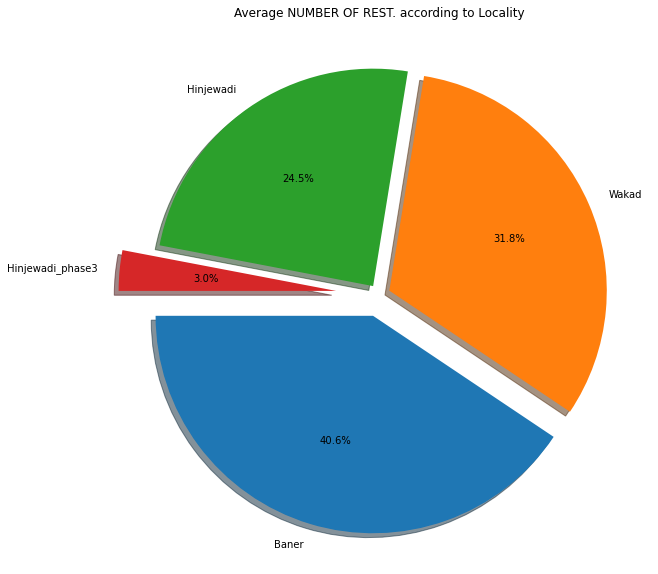

In [15]:
plt.figure(figsize=(20,16))
ax=combine.locality.value_counts()
labels = ['Baner',  'Wakad', 'Hinjewadi', 'Hinjewadi_phase3']
explode = (0.1, 0.05, 0.05,0.2)
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.title("Average NUMBER OF REST. according to Locality")
ax1.pie(ax, explode=explode,labels= labels, shadow=True,autopct='%1.1f%%' ,startangle=180,)
plt.rcParams['font.size'] = 20

plt.show()

In [16]:
above_one = combine[(combine.ratings > 1.0)]
above_one

,name,cuisine,locality,ratings,time,price_for2
0,Lkd | La Kheer Deli,Desserts,Baner,4.5,-- MINS,200.0
1,Desi Handi,"North Indian, Chinese, Biryani, Snacks, Tandoo...",Baner,3.3,-- MINS,250.0
2,The Quick Wok,"Chinese, Thai",Baner,4.0,-- MINS,300.0
3,Flavours Of Andhra,Biryani,Baner,3.5,-- MINS,600.0
4,Godavari Ruchulu,"North Indian, Chinese, Beverages, Indian, Biryani",Baner,3.8,-- MINS,600.0
...,...,...,...,...,...,...
1147,Paratha Corner,"North Indian, Punjabi",Wakad,4.1,-- MINS,120.0
1151,World Of Sweets,Sweets,Wakad,4.0,-- MINS,400.0
1153,Itminaan Biryani - Dum Pukht,"Biryani, North Indian, Mughlai",Wakad,4.1,-- MINS,400.0
1155,Apricot Veg,"Chinese, North Indian",Wakad,4.3,-- MINS,300.0


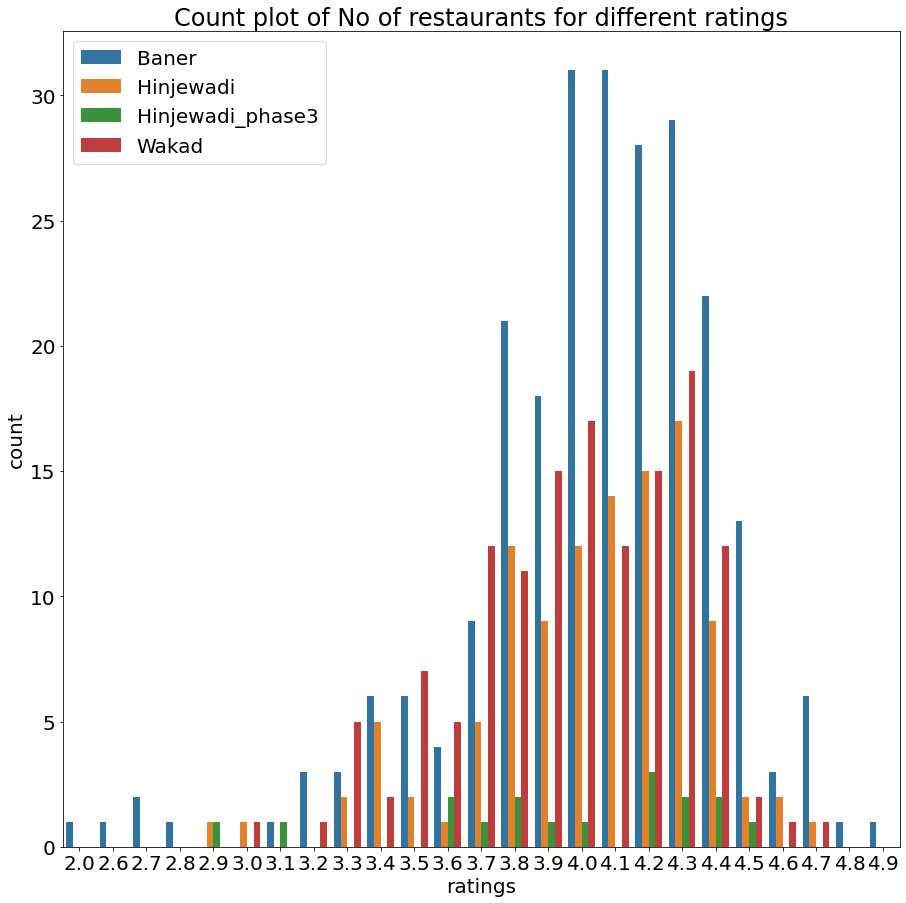

In [17]:
fig = plt.gcf()
sns.countplot(data = above_one, hue = 'locality', x = 'ratings').legend(loc=2)
plt.title('Count plot of No of restaurants for different ratings')
fig.set_size_inches(15, 15)
plt.show()

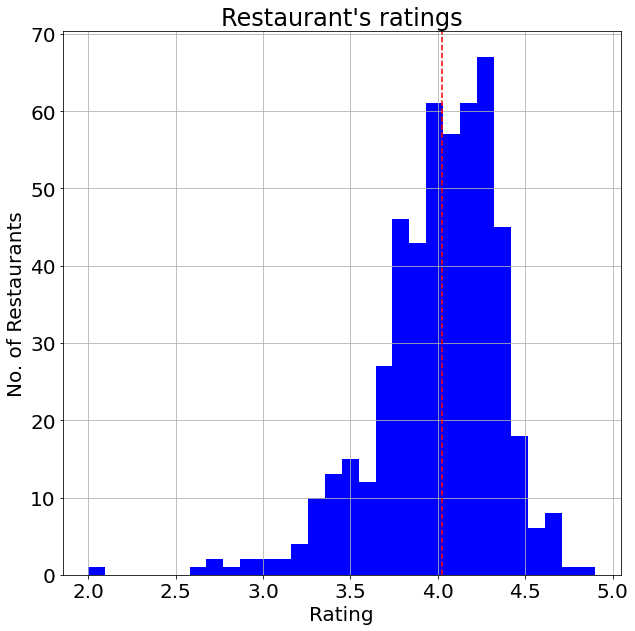

4.021343873517788


In [18]:
plt.figure(figsize=(10,10))
above_one.ratings.hist(color='blue',bins=30)
plt.axvline(x=above_one.ratings.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()
print(above_one.ratings.mean())


In [19]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1165 non-null   object 
 1   cuisine     1165 non-null   object 
 2   locality    1165 non-null   object 
 3   ratings     1165 non-null   float64
 4   time        1165 non-null   object 
 5   price_for2  1165 non-null   float64
dtypes: float64(2), object(4)
memory usage: 54.7+ KB


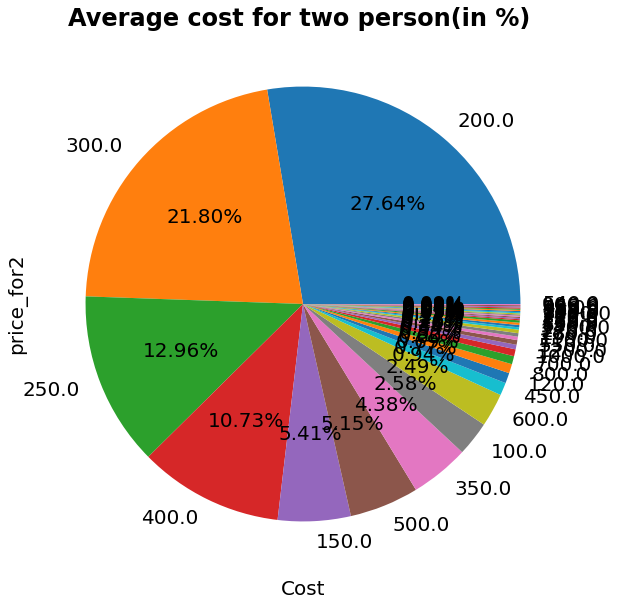

In [20]:
plt.figure(figsize=(15,10))
ax=combine.price_for2.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.xlabel('Cost')
plt.show()

In [69]:
plt.figure(figsize=(15,10))
f = combine.price_for2.value_counts()
fig = px.pie(combine, values=f, names=f.index, width=950, height=1000,title="Average cost for two person(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [70]:
cuisines=[j.lower().strip() for i in combine.cuisine for j in i.split(',')]

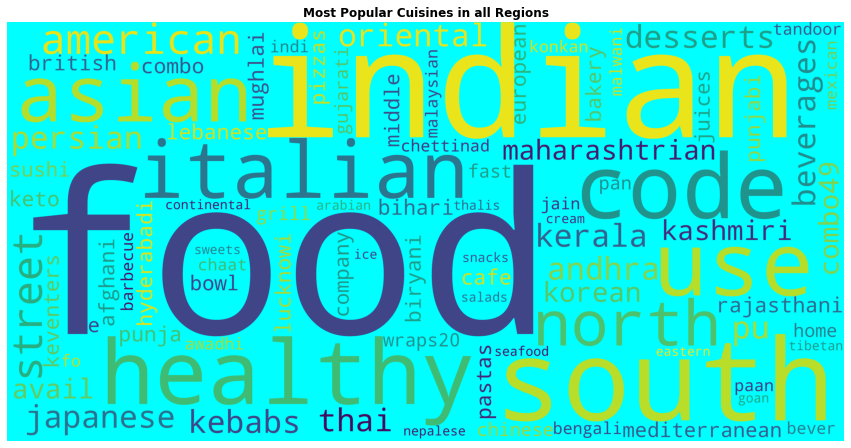

In [90]:
plt.figure( figsize=(15,10) )
cuisines_set=set(cuisines)
cuisines_wc=', '.join(cuisines_set)
wc=WordCloud(stopwords=STOPWORDS,max_words=len(cuisines_wc),background_color = 'cyan',height =3000,width = 6000)
wc.generate(cuisines_wc)

plt.imshow(wc,interpolation='bilinear')
plt.title('Most Popular Cuisines in all Regions',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()